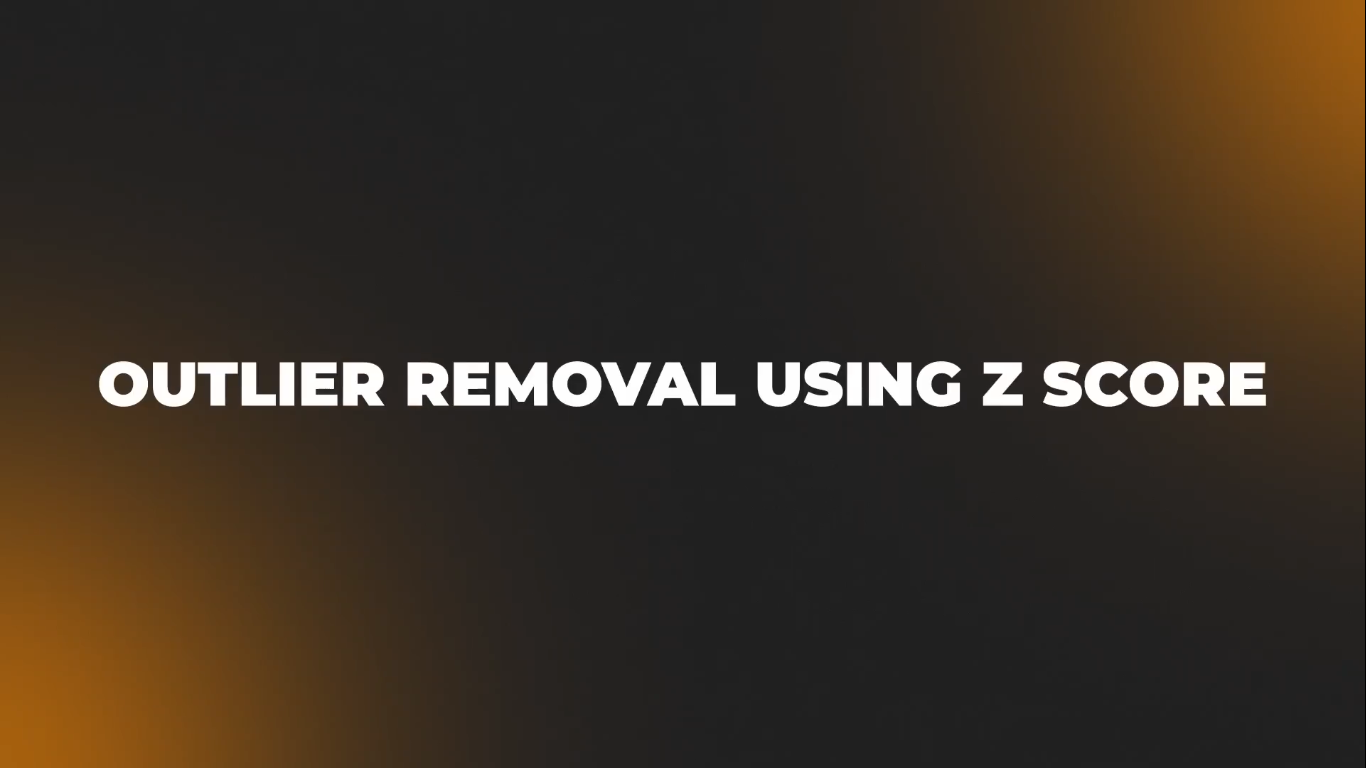

In [1]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.2.1.png"))

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# Fill NaN Value by mode 

for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

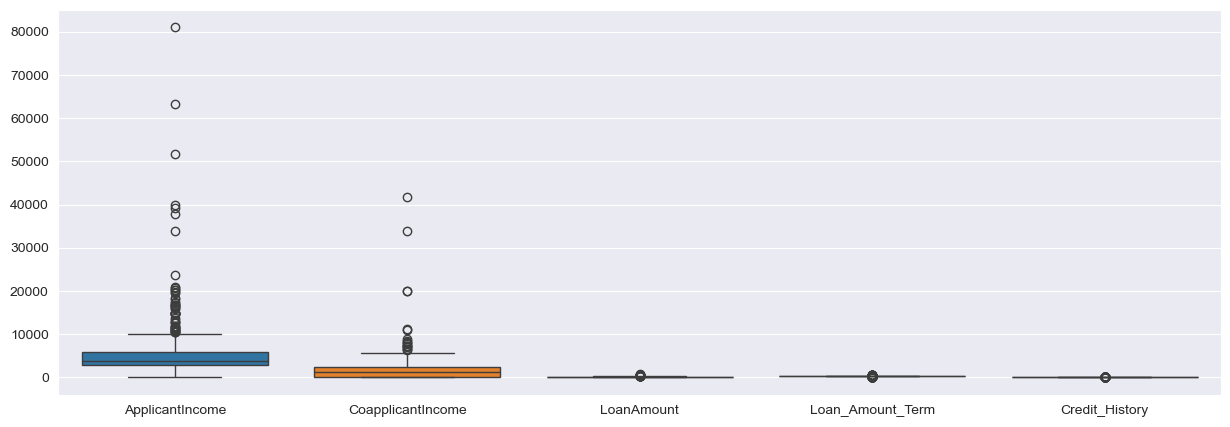

In [7]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")

sns.boxplot(df)
plt.show()

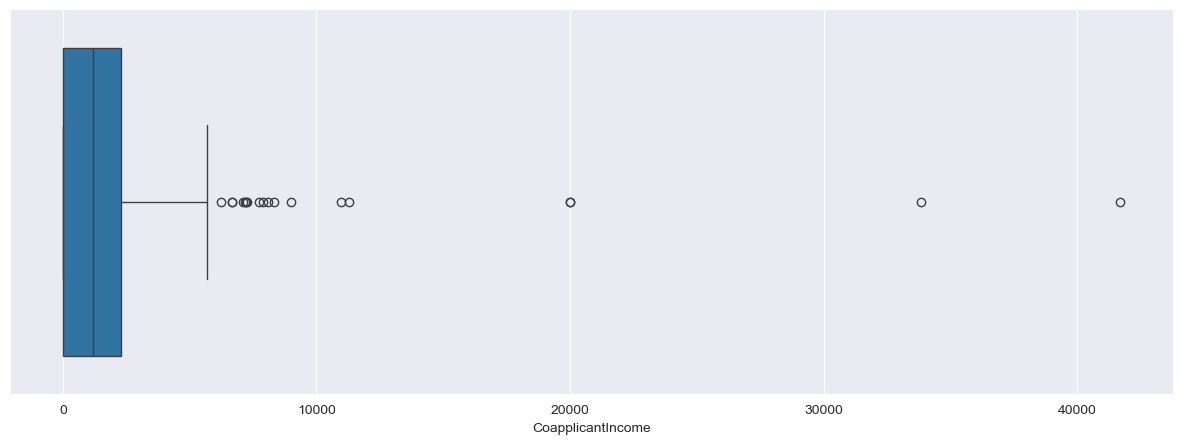

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'CoapplicantIncome', data=df)
plt.show()

# Remove Outlier Using **Direct Mathode**

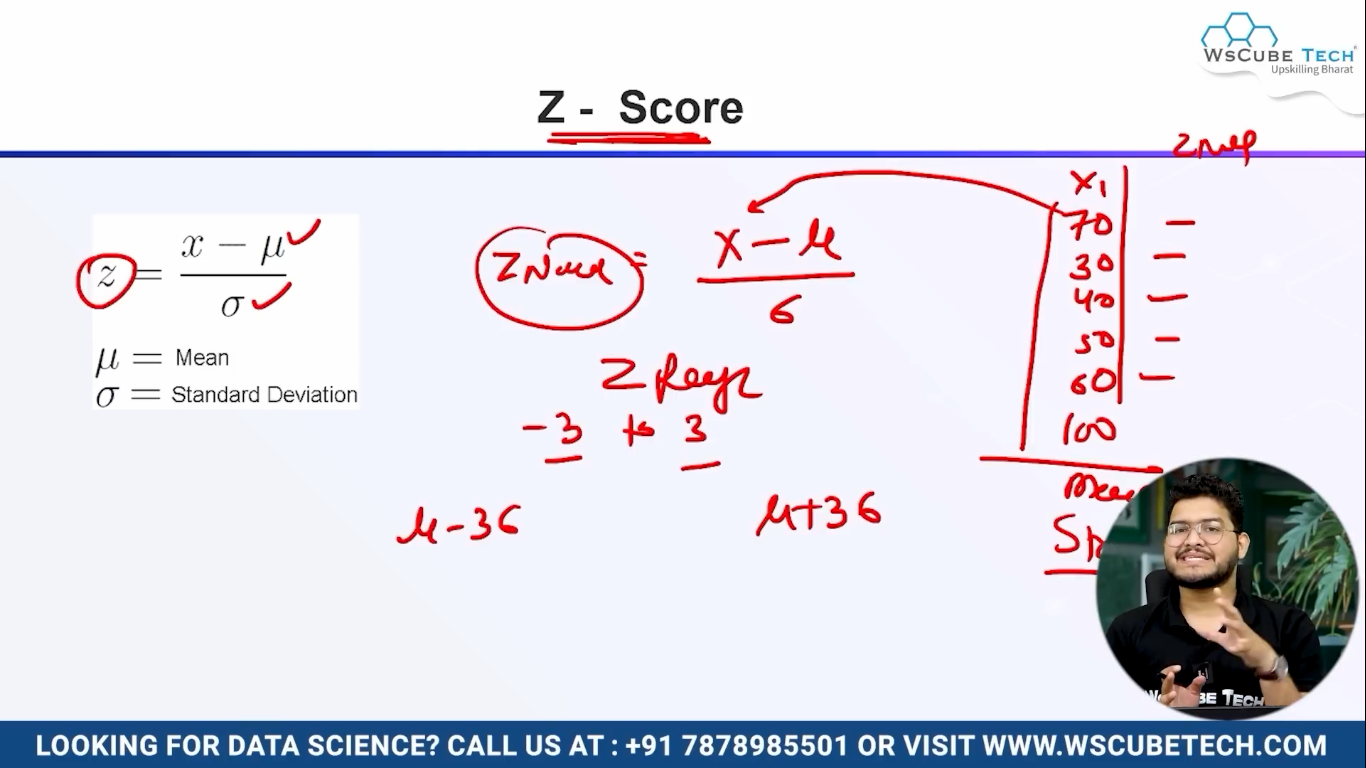

In [30]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.5.png"))

In [34]:
min_range = (df['CoapplicantIncome'].mean()) - (3 * df['CoapplicantIncome'].std())
max_range = (df['CoapplicantIncome'].mean()) + (3 * df['CoapplicantIncome'].std())

min_range, max_range

(-7157.499309645475, 10399.990905699677)

In [36]:
new_df = df[(df['CoapplicantIncome'] >= min_range) & (df['CoapplicantIncome'] <= max_range)]
new_df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


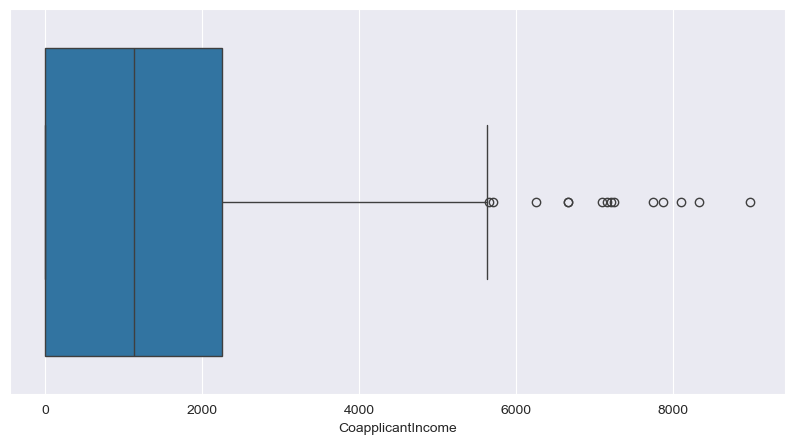

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=new_df)
plt.show()

# Remove Outlier Using **Z_Score Mathode**

In [57]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

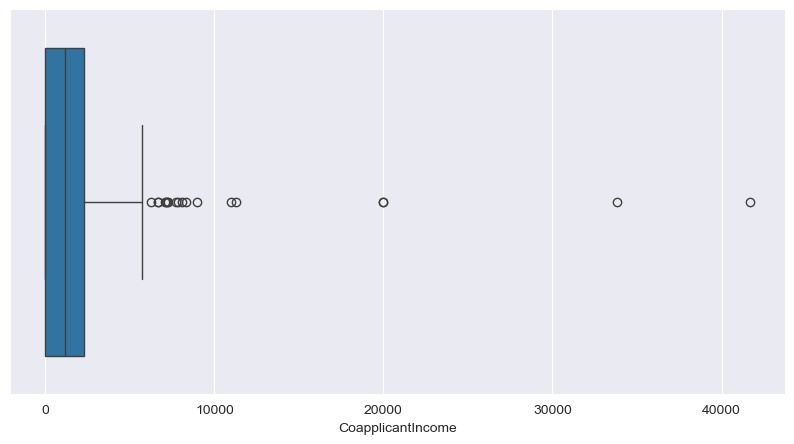

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'CoapplicantIncome', data=df)
plt.show()

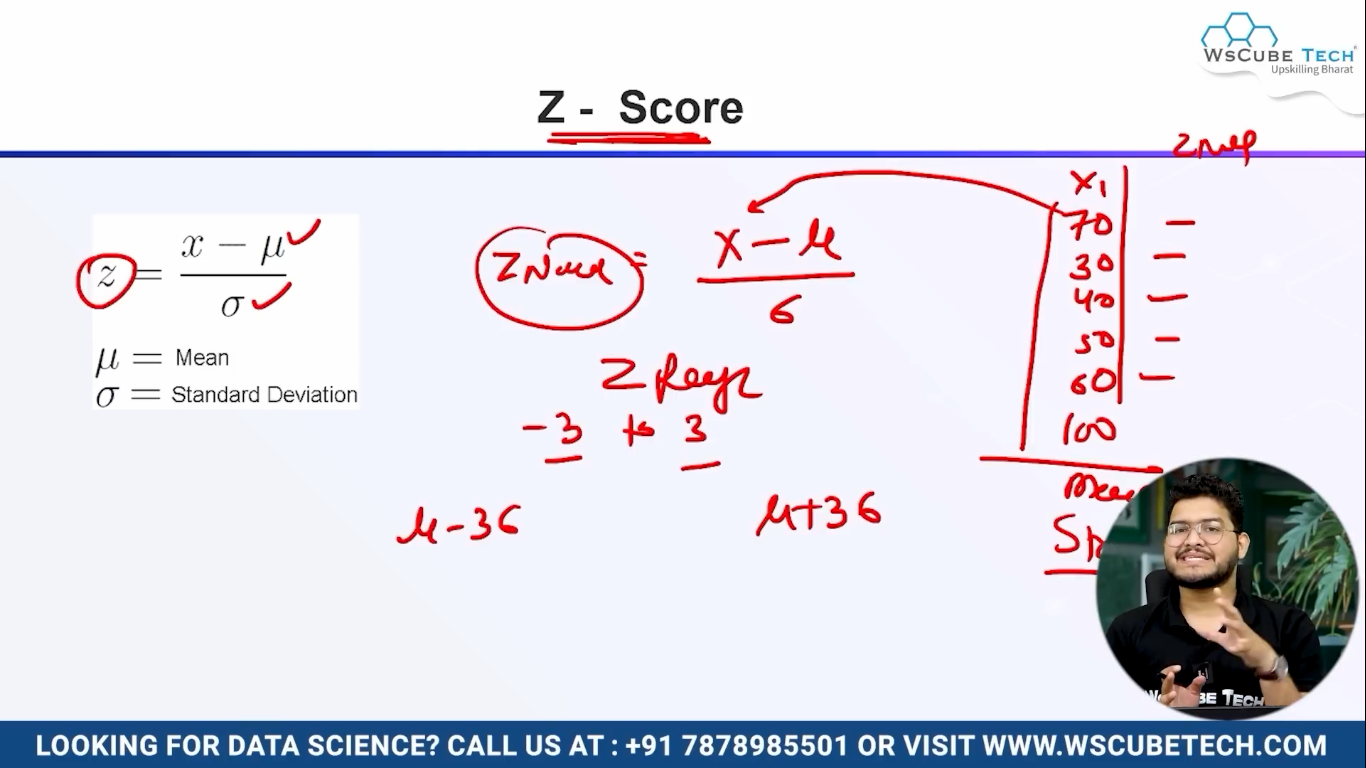

In [30]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_09.5.png"))

In [13]:
# using Z_Scores for remove outlier # Alternative

from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(df['CoapplicantIncome'])

# Filter using Z-score threshold
_df = df[(abs(z_scores) < 3)] # abs ==> absolute value

# Display normalized value counts
_df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 282, dtype: int64

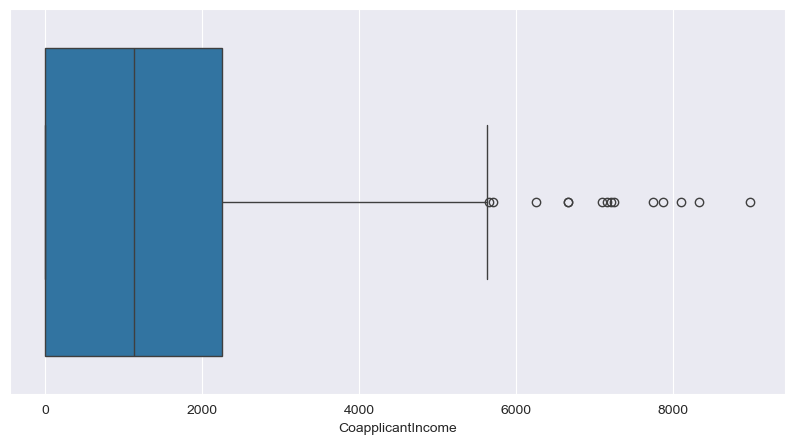

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'CoapplicantIncome', data=_df)
plt.show()

In [17]:
_df['CoapplicantIncome'].shape

(608,)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
